In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import sys
if sys.version_info >= (3,8):
    import pickle
else:
    !pip install pickle5
    import pickle5 as pickle
import os

Mounted at /content/drive
     |████████████████████████████████| 256 kB 5.1 MB/s 


In [ ]:
import numpy as np
os.listdir('/content/drive/My Drive/')

with open('/content/drive/My Drive/Colab_Files/tiny_SOL_A234.pickle', 'rb') as f:
    tiny_SOL_A234 = pickle.load( f )

# prepare data
d = {}
for k in list(tiny_SOL_A234.keys()):
    d[k] = np.array( tiny_SOL_A234[k] )

print('d: ', d)

d:  {'Strings': array([[-2.2789856e-05,  3.4714117e-06,  6.8824233e-06, ...,
         2.6607488e-03,  2.7268296e-03,  2.5541352e-03],
       [-6.0416451e-06,  1.1028062e-05,  1.0251205e-05, ...,
         2.1480646e-03,  7.0521206e-04,  1.5959663e-06],
       [ 2.7013809e-06, -6.1810360e-06, -1.3110802e-05, ...,
        -4.7711511e-03, -7.2772172e-03, -9.0749208e-03],
       ...,
       [-1.3529927e-05, -5.9575985e-05, -2.2340890e-05, ...,
        -2.9565550e-02, -2.8640090e-02, -4.8572134e-02],
       [-1.0917043e-05, -3.5950157e-05, -9.5189665e-05, ...,
        -3.6026593e-02, -8.3123930e-02, -9.8982669e-02],
       [-4.6648142e-06,  2.1061091e-05,  3.6393894e-06, ...,
        -9.6544974e-02, -7.2520874e-02, -1.1038780e-01]], dtype=float32), 'Keyboards': array([[ 5.7973990e-05,  8.9495283e-05,  6.7846093e-05, ...,
        -2.1354449e-03, -1.7567954e-03, -1.3858383e-03],
       [ 5.3796688e-05,  8.0413360e-05,  5.6462399e-05, ...,
        -1.1429756e-03,  2.5438250e-03,  5.1401900e-03]

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
max_norm_value = 2.0
input_shape = [16000,1]

# create the model
encoder = keras.models.Sequential()
encoder.add(keras.layers.Conv1D(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
encoder.add(keras.layers.Conv1D(16, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))

decoder = keras.models.Sequential()
decoder.add(keras.layers.Conv1DTranspose(16, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
decoder.add(keras.layers.Conv1DTranspose(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
decoder.add(keras.layers.Conv1D(1, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='tanh', padding='same'))

model = keras.models.Sequential([encoder, decoder])

encoder.summary()
decoder.summary()
model.summary()

# Create the model
# model = keras.models.Sequential()
# model.add(keras.layers.Conv1D(128, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform', input_shape=input_shape))
# model.add(keras.layers.Conv1D(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# model.add(keras.layers.Conv1DTranspose(32, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# model.add(keras.layers.Conv1DTranspose(128, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='relu', kernel_initializer='he_uniform'))
# model.add(keras.layers.Conv1D(1, kernel_size=3, kernel_constraint=keras.constraints.max_norm(max_norm_value), activation='tanh', padding='same'))

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 15998, 32)         128       
                                                                 
 conv1d_1 (Conv1D)           (None, 15996, 16)         1552      
                                                                 
Total params: 1,680
Trainable params: 1,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_transpose (Conv1DTra  (None, 15998, 16)        784       
 nspose)                                                         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 16000, 32)        1568      
 ranspose)                      

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(d['Brass'], d['Brass'], epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.0059
Epoch 2/30
1/1 [==============================] - 1s 1s/step - loss: 0.0043
Epoch 3/30
1/1 [==============================] - 1s 1s/step - loss: 0.0032
Epoch 4/30
1/1 [==============================] - 1s 1s/step - loss: 0.0024
Epoch 5/30
1/1 [==============================] - 1s 1s/step - loss: 0.0018
Epoch 6/30
1/1 [==============================] - 1s 1s/step - loss: 0.0014
Epoch 7/30
1/1 [==============================] - 1s 1s/step - loss: 0.0010
Epoch 8/30
1/1 [==============================] - 1s 1s/step - loss: 7.8635e-04
Epoch 9/30
1/1 [==============================] - 1s 1s/step - loss: 6.1719e-04
Epoch 10/30
1/1 [==============================] - 1s 1s/step - loss: 4.9459e-04
Epoch 11/30
1/1 [==============================] - 1s 1s/step - loss: 4.0450e-04
Epoch 12/30
1/1 [==============================] - 1s 1s/step - loss: 3.3795e-04
Epoch 13/30
1/1 [==============================] - 1s 1s/step - l

In [ ]:
y = model.predict(d['Brass'])

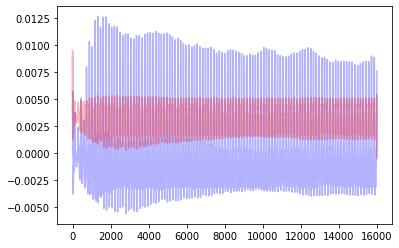

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
plt.plot(d['Brass'][0], 'b', alpha=0.3)
plt.plot(y[0,:], 'r', alpha=0.3)
plt.show()

In [ ]:
import IPython
# original
s = d['Brass'][10]
IPython.display.Audio(s, rate=16000, autoplay=True)

In [ ]:
# synthesized
s = np.reshape( y[10,:], 16000 )
IPython.display.Audio(s, rate=16000, autoplay=True)

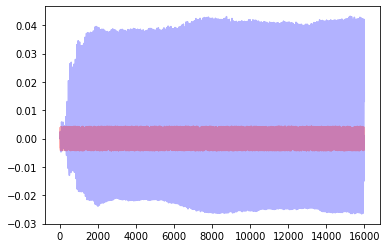

In [ ]:
# denoise
import copy
s = copy.deepcopy( d['Brass'][10] )
n = -0.1*np.max(np.abs(s))*( 2*np.random.random(s.shape) - 1 )
plt.clf()
plt.plot(s, 'b', alpha=0.3)
plt.plot(n, 'r', alpha=0.3)
plt.show()
noisy = s + n
noisy[ noisy > 1 ] = 1
noisy[ noisy < -1 ] = -1
IPython.display.Audio(noisy, rate=16000, autoplay=True)

In [ ]:
denoised = model.predict( np.reshape( noisy , (1,16000,1) ) )

In [ ]:
IPython.display.Audio( np.reshape( denoised[0] , 16000 ), rate=16000, autoplay=True)

In [ ]:
# other instrument?
y = model.predict(d['Strings'])

In [ ]:
s = d['Strings'][2]
IPython.display.Audio(s, rate=16000, autoplay=True)

In [ ]:
# synthesized
s = np.reshape( y[2,:], 16000 )
IPython.display.Audio(s, rate=16000, autoplay=True)